In [ ]:
from google.colab import drive
import sys
drive.mount('/content/gdrive')
sys.path.append('/content/gdrive/MyDrive/AIM')
!ls -l /content/gdrive/MyDrive/AIM/*.py
import aim_util
import aim_xformer

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
-rw------- 1 root root 7020 May 23 15:18 /content/gdrive/MyDrive/AIM/aim_util.py
-rw------- 1 root root 4688 May 23 15:17 /content/gdrive/MyDrive/AIM/aim_xformer.py


In [ ]:
#!cat /content/gdrive/MyDrive/AIM/aim_xformer.py

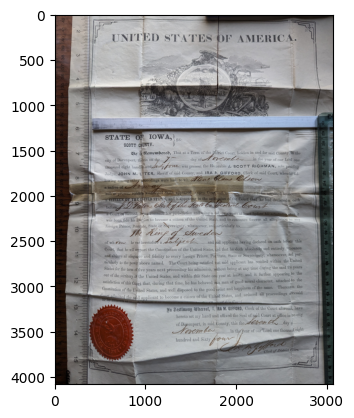

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

base_name = 'citizen_1864_xform0'
image_path = '/content/gdrive/MyDrive/AIM/citizen_1864_rescan.jpg'

#aim_util.show_image(image_path)
img = mpimg.imread(image_path)
plt.imshow(img)


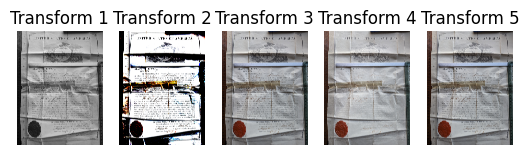

In [ ]:
aim_xformer.trial_xform(image_path)

In [ ]:
!ls -l /content/gdrive/MyDrive/AIM/citizen_xform*

-rw------- 1 root root 3890679 May 23 15:19 /content/gdrive/MyDrive/AIM/citizen_xform1.jpg
-rw------- 1 root root 4282849 May 23 15:19 /content/gdrive/MyDrive/AIM/citizen_xform2.jpg
-rw------- 1 root root 2669393 May 23 15:19 /content/gdrive/MyDrive/AIM/citizen_xform3.jpg
-rw------- 1 root root 6732009 May 23 15:19 /content/gdrive/MyDrive/AIM/citizen_xform4.jpg
-rw------- 1 root root 4093224 May 23 15:19 /content/gdrive/MyDrive/AIM/citizen_xform5.jpg


# **grayscale**

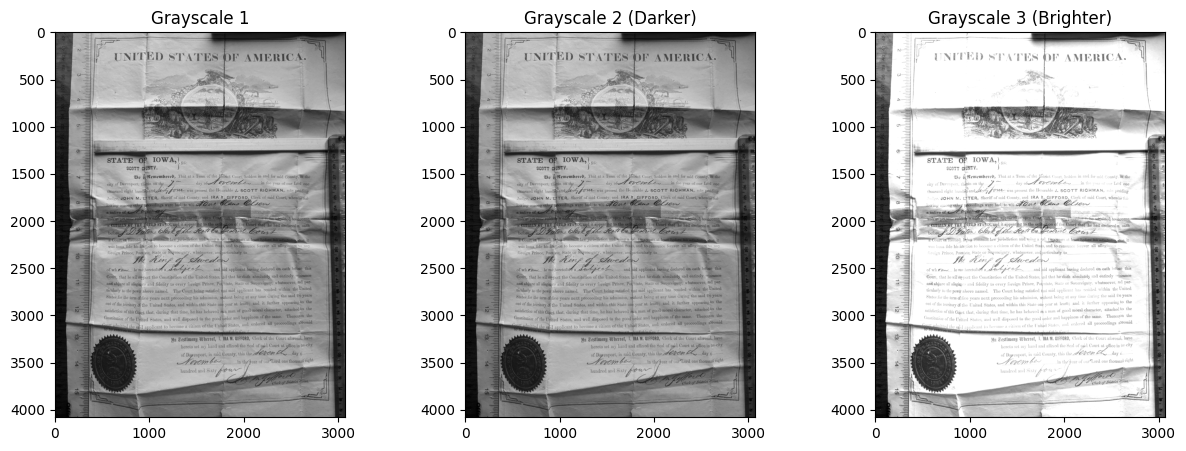

In [ ]:
aim_xformer.apply_grayscale(image_path, 0.5, 1.8)

# **contrast_and_brightness**

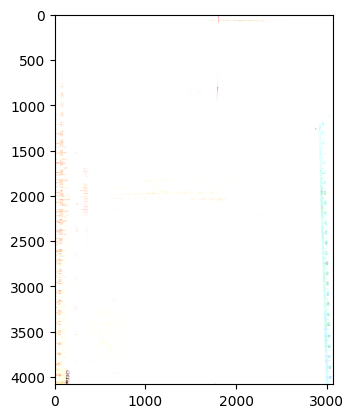

In [ ]:
adj_default_img = aim_xformer.contrast_and_brightness(img)
plt.imshow(adj_default_img)

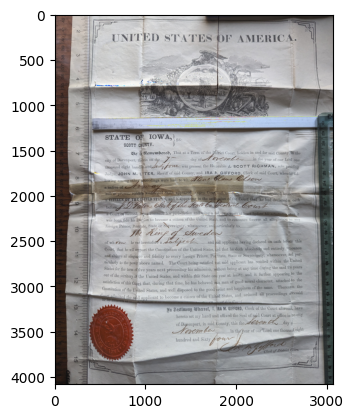

In [ ]:
adj_img = aim_xformer.apply_contrast_and_brightness(image_path, 1, 16)

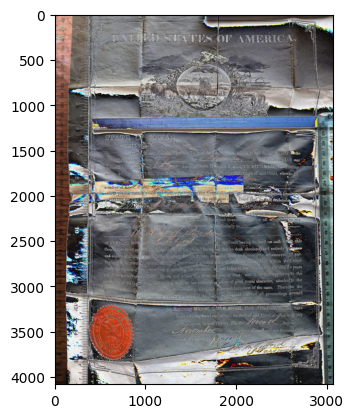

In [ ]:
adj_img = aim_xformer.apply_contrast_and_brightness(image_path, 2, 8)

##########################################################################